In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import  svm
import pickle
from matplotlib import cm
import seaborn as sns
import plotly_express as px
color_pallete = ['#fc5185', '#3fc1c9', '#364f6b']
sns.set_palette(color_pallete)
sns.set_style("white")

from sklearn.metrics import accuracy_score



from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB



from sklearn.linear_model import LogisticRegression

In [2]:
iris=datasets.load_iris()
iris.data
iris.target
X,y=iris.data,iris.target


In [3]:
print("Feature names:")
print(iris.feature_names)
print("Data(X):")
print(iris.data[:3])
print("Target names:[0   1   2]")
print(iris.target_names)
print("Target(y):")
print(iris.target)

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data(X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Target names:[0   1   2]
['setosa' 'versicolor' 'virginica']
Target(y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:

data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

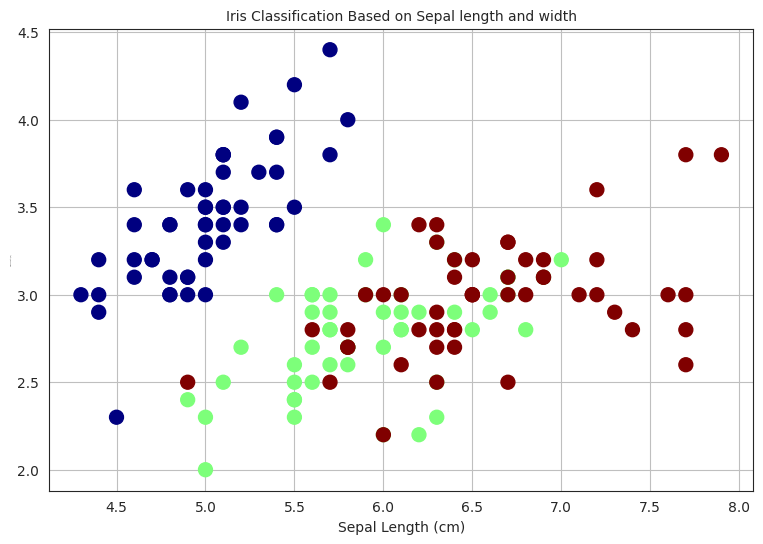

In [6]:


# Petal Length and Width
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
ax.set_title('Iris Classification Based on Sepal length and width', fontsize=10)
ax.set_xlabel('Sepal Length (cm)', fontsize=10)
ax.set_ylabel('Sepal Width (cm)',fontsize=1)
# setting grid lines 
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(data['sepal length (cm)'], data['sepal width (cm)'], s = 100, 
           c=data['target'], marker='o', cmap=cm.jet)
           


# Sepal Length and Width
# ax = fig.add_subplot(122)
# ax.set_title("iris Classification Based on Petal length and width", fontsize=20)
# ax.set_xlabel('Petal Length (cm)', fontsize=18)
# ax.set_ylabel('Petal width (cm)', fontsize=18)
# ax.grid(True, linestyle='-', color='0.75')
# ax.scatter(data['petal length (cm)'], data['petal width (cm)'], s = 100, 
#            c=data['target'], marker='s', cmap=cm.jet)

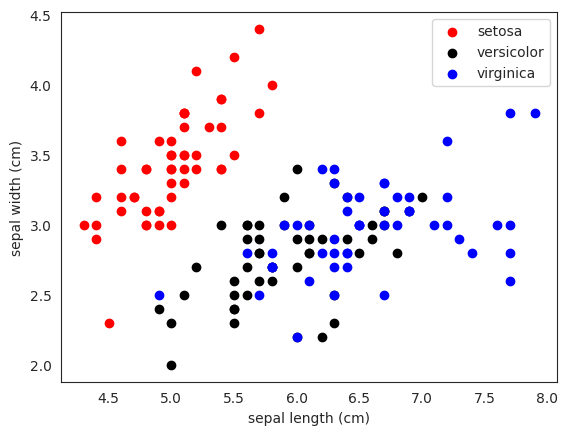

In [7]:


plt.scatter(data[data.target==0].iloc[:,0],data[data.target==0].iloc[:,1],color='red',label=iris.target_names[0])
plt.scatter(data[data.target==1].iloc[:,0],data[data.target==1].iloc[:,1],color='black',label=iris.target_names[1])
plt.scatter(data[data.target==2].iloc[:,0],data[data.target==2].iloc[:,1],color='blue',label=iris.target_names[2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()


0 1


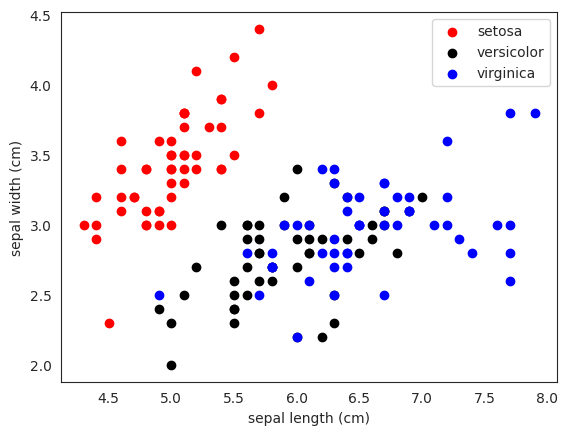

0 2


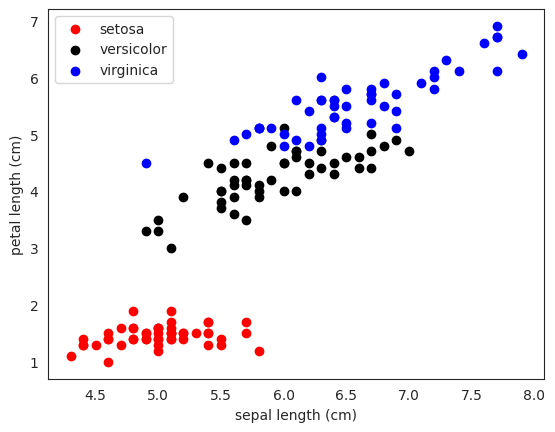

0 3


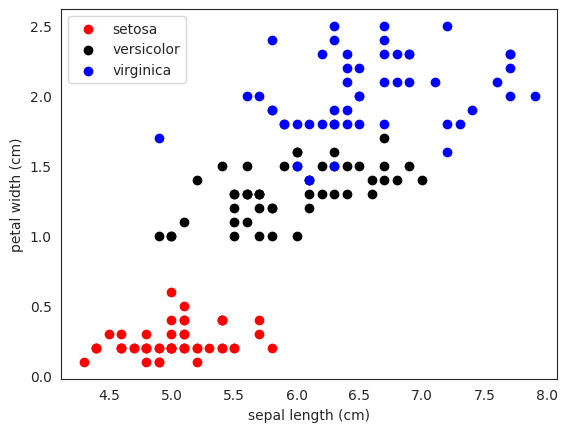

1 0


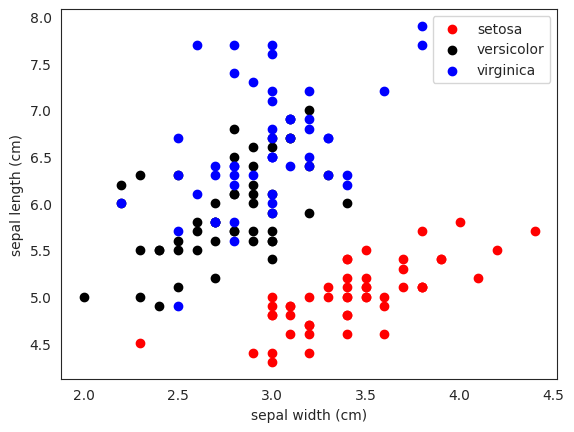

1 2


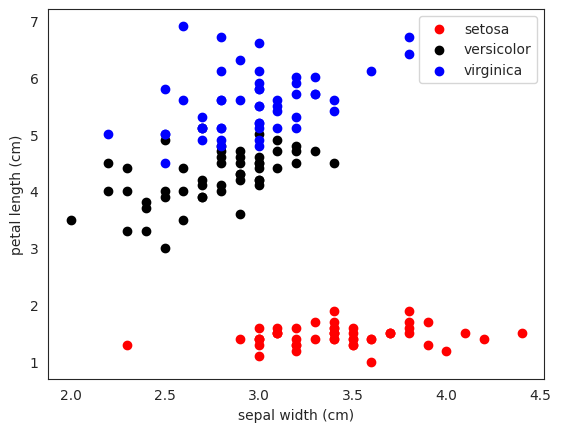

1 3


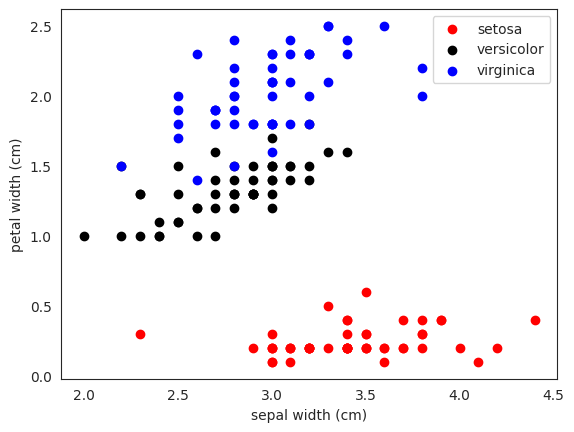

2 0


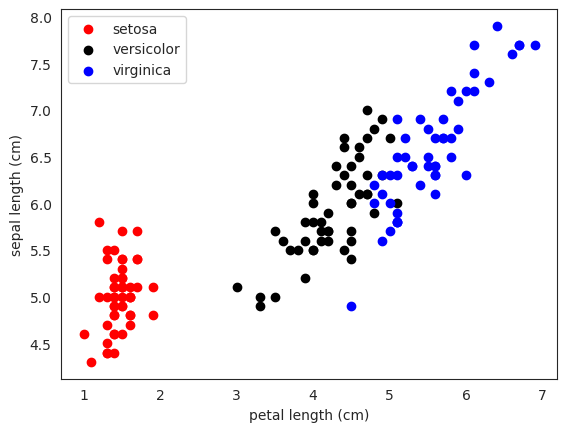

2 1


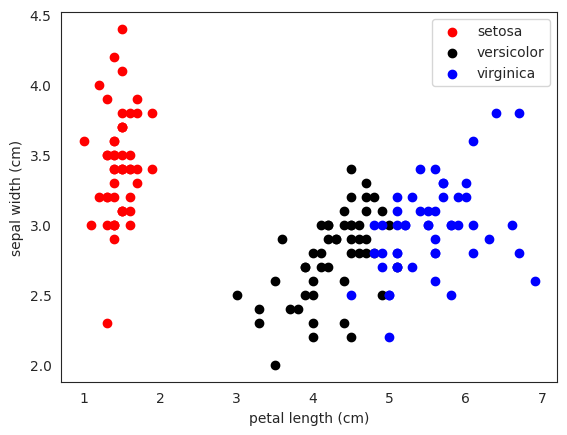

2 3


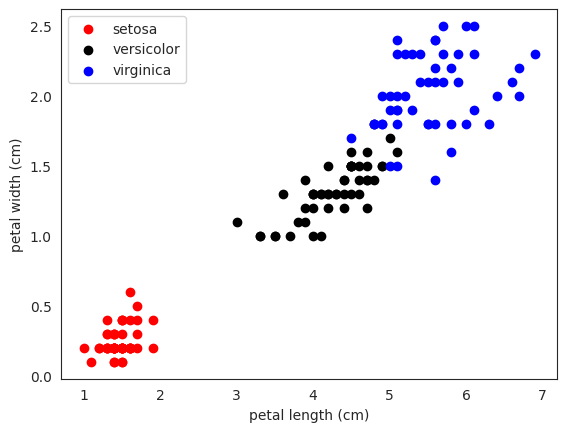

3 0


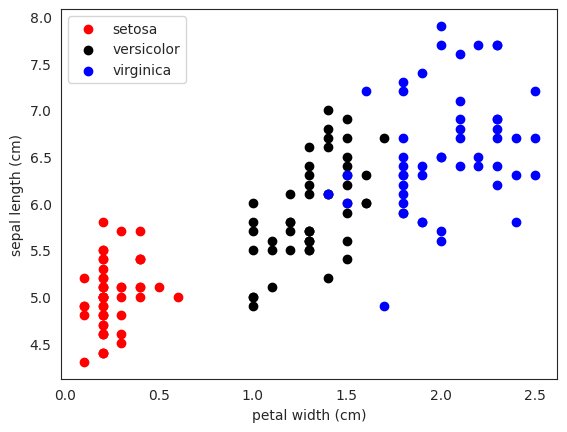

3 1


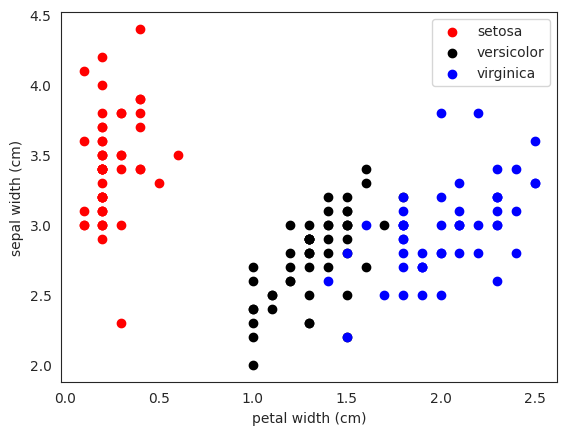

3 2


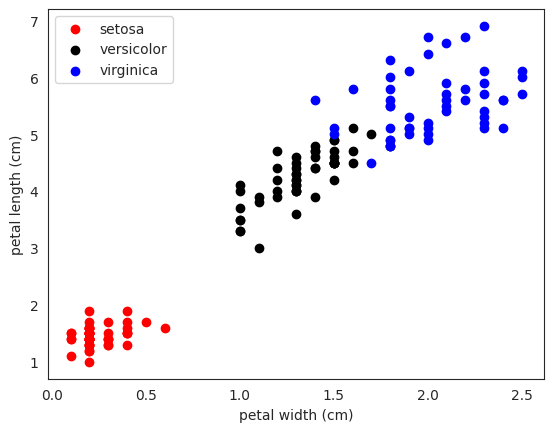

In [8]:

feature_name=list(iris.feature_names)
for i in range(len(feature_name)):
    for j in range(len(feature_name)):
        if i==j:
            continue
        print(i,j)


        plt.scatter(data[data.target==0].loc[:,feature_name[i]],data[data.target==0].loc[:,feature_name[j]],color='red',label=iris.target_names[0])
        plt.scatter(data[data.target==1].loc[:,feature_name[i]],data[data.target==1].loc[:,feature_name[j]],color='black',label=iris.target_names[1])
        plt.scatter(data[data.target==2].loc[:,feature_name[i]],data[data.target==2].loc[:,feature_name[j]],color='blue',label=iris.target_names[2])
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.legend()
        plt.show()

<Figure size 800x800 with 0 Axes>

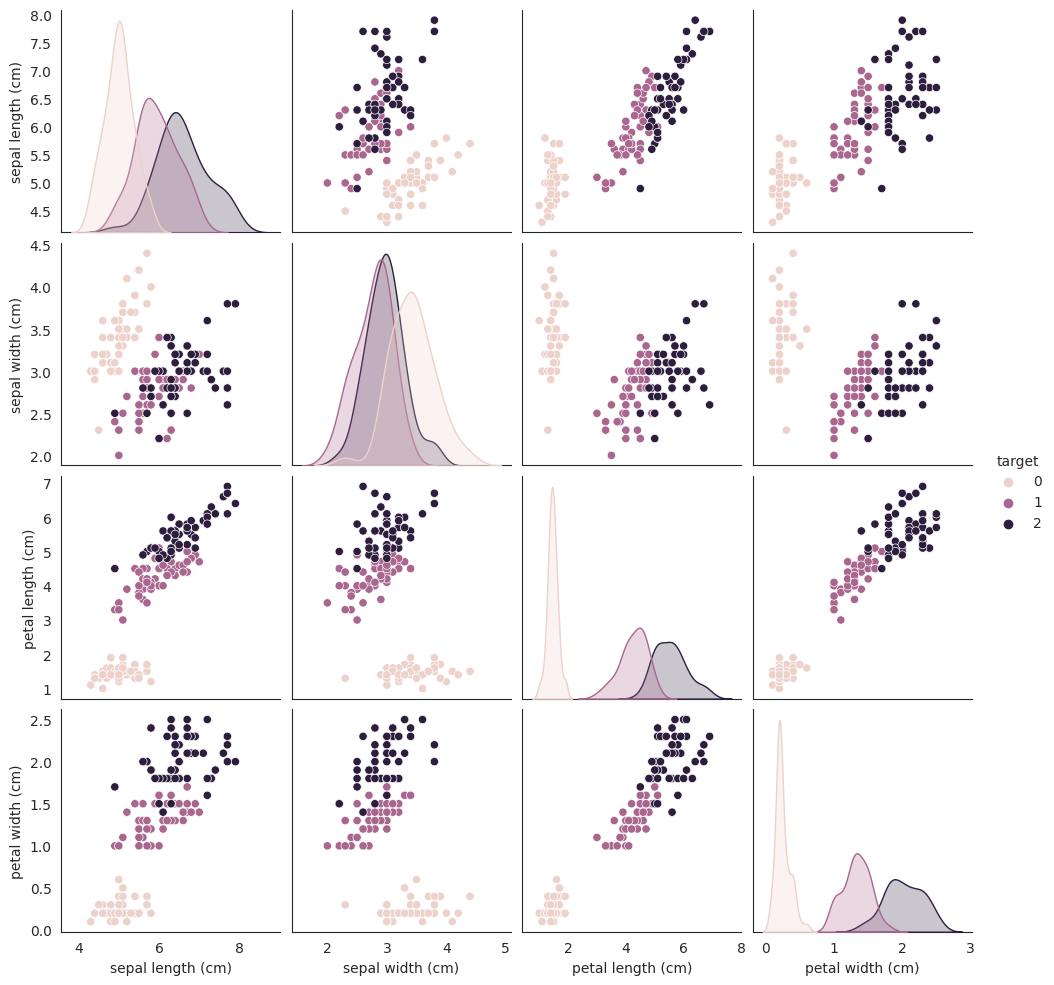

In [9]:


plt.figure(figsize=(8, 8))
ax = sns.pairplot(data, hue='target')
plt.show()



'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

In [10]:
px.scatter_3d(data, x='petal length (cm)', y='petal width (cm)', z='sepal length (cm)', size='sepal width (cm)', 
              color="target", color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

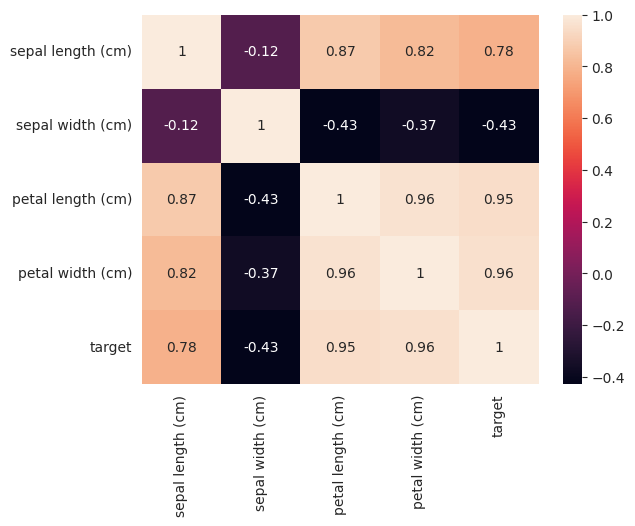

In [11]:
plt.figure() 
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
clf=svm.SVC(gamma='scale')

clf.fit(X,y)

SVC()

In [13]:
s=pickle.dumps(clf)
clf2=pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [14]:
(clf.predict(X)==y).sum()/len(X)

0.9733333333333334

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)

In [16]:
svc = svm.SVC()
svc.fit(X_train,y_train)

pred = svc.predict(X_test) 
accuracy_score(pred, y_test)


1.0

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

pred = knn.predict(X_test) 
print(accuracy_score(pred, y_test))

0.98


In [18]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)

pred = nbc.predict(X_test) 
print(accuracy_score(pred, y_test))

0.96


In [19]:
lrc = LogisticRegression()
lrc.fit(X_train,y_train)

pred = lrc.predict(X_test) 
print(accuracy_score(pred, y_test))

1.0


/home/jabed/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [20]:
knn = KNeighborsClassifier(n_neighbors = 1)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# test accuracy
print(accuracy_score(y_test, y_pred))

0.98


In [21]:
k_range = range(1, 31)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

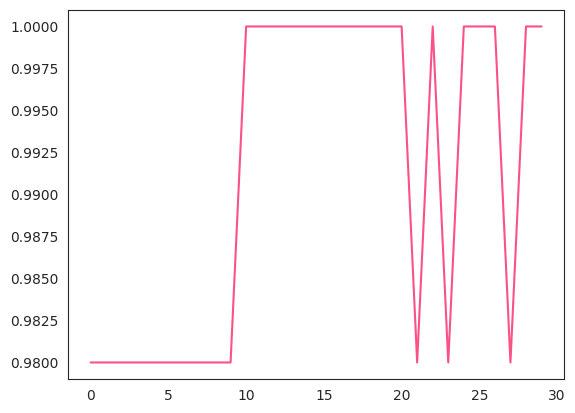

In [22]:
plt.plot(scores)

In [23]:
knn = KNeighborsClassifier(n_neighbors = 12)

# train
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))

# test accuracy

1.0


Referance:

In [24]:
#https://www.kaggle.com/code/imdevskp/plotly-express-3d-scatter-plot-iris-data/notebook
#https://www.kaggle.com/code/leenas/iris-classification-scikit-learn-practice